# Machine Learning - Cancer (Maligno/Benigno)
### Modelo de Predição de Cancer Maligno ou Benigno
### Python + Jupyter Notebook + Visualização de Dados
### 20/10/2023
### Jonatha Rodrigues T. Vaz


# Iniciando Projeto

## Importações de Bibliotecas Python

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
from ipywidgets import widgets

pyplot.style.use('dark_background')


## Leitura do Arquivo e Armanezamento das Colunas 

In [3]:
data = pd.read_csv("Cancer_Data.csv")

column_names = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

## Criando DataFrame
## Convertendo Coluna de Target de Categórica para Numérica

In [4]:
df = pd.DataFrame(data,columns=column_names)
df['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)

## Exibindo Mapa de Calor de Dados

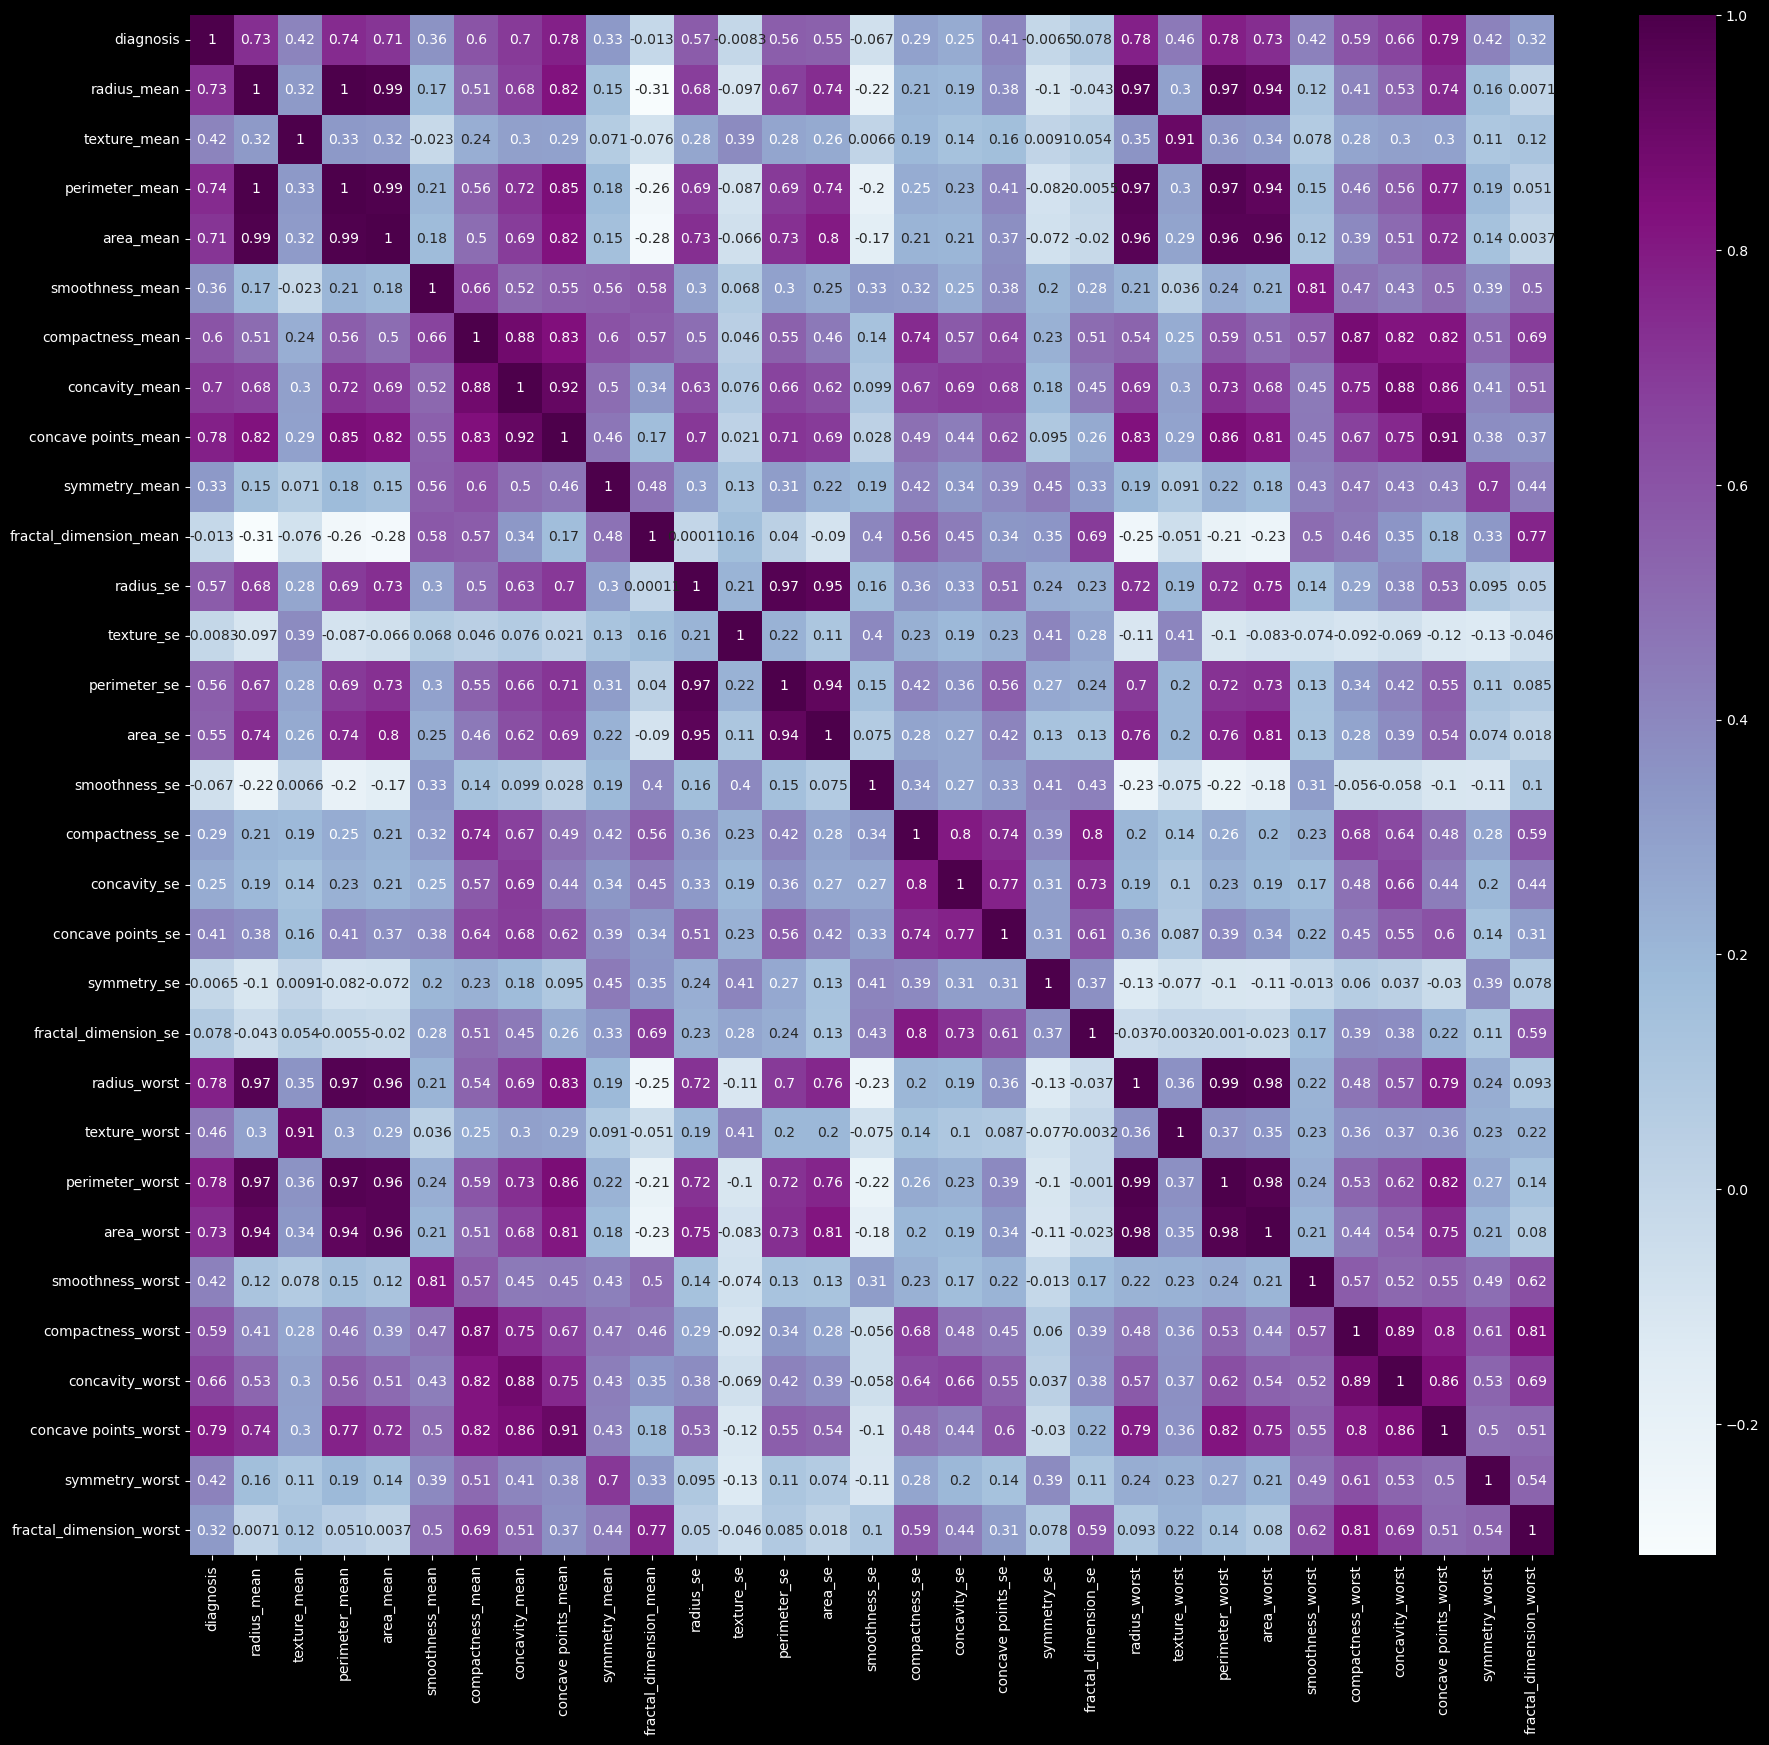

In [18]:
pyplot.figure(figsize=(22,20))
sns.heatmap(df.corr(),cbar=True,annot=True, cmap="BuPu")
pyplot.show()

## Dados do Grupo com Base no tipo de Diagnóstico e Gráfico de Exibição

<Axes: xlabel='diagnosis'>

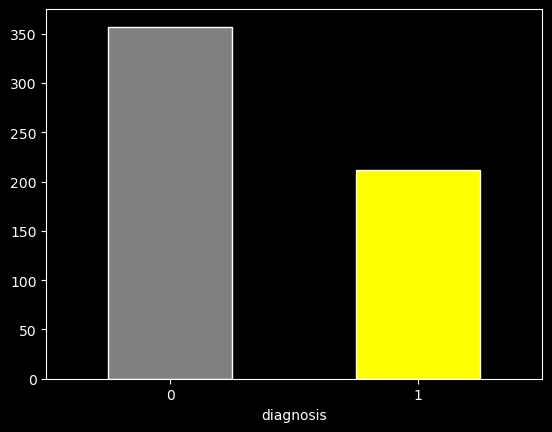

In [30]:
num_types = df.groupby(by='diagnosis').size()
num_types.plot.bar(color=['grey', 'yellow'],rot=0, edgecolor='white')

## Agrupando Dados por Tipo de Diagnóstico

In [31]:
diagnosis_B = df[df['diagnosis'] == 0]
diagnosis_M = df[df['diagnosis'] == 1]

## Definindo Função para Gerar Série de Histogramas

In [36]:
def generate_histplot(attribute):
    sns.histplot(diagnosis_B[attribute], color='yellow', kde=True, bins = 10)
    sns.histplot(diagnosis_M[attribute], color='grey', kde=True, bins = 10)
    pyplot.show();

## Gerando Histogramas para Colunas Médias

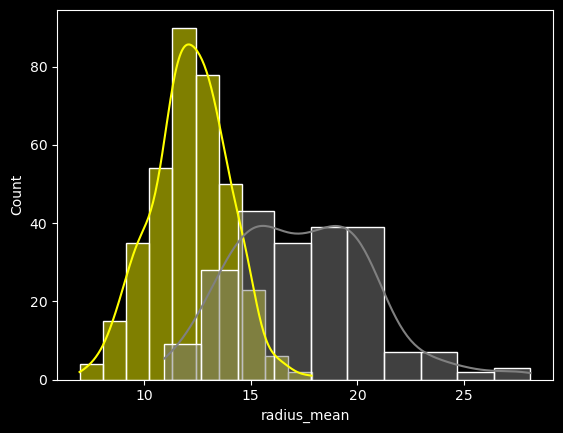

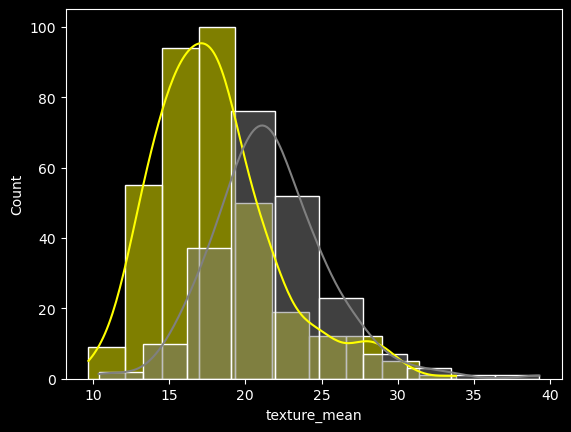

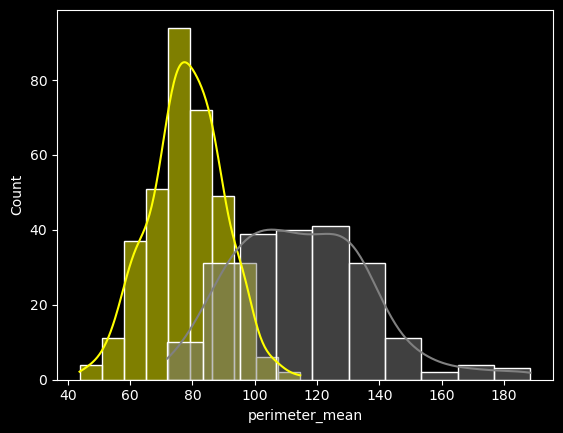

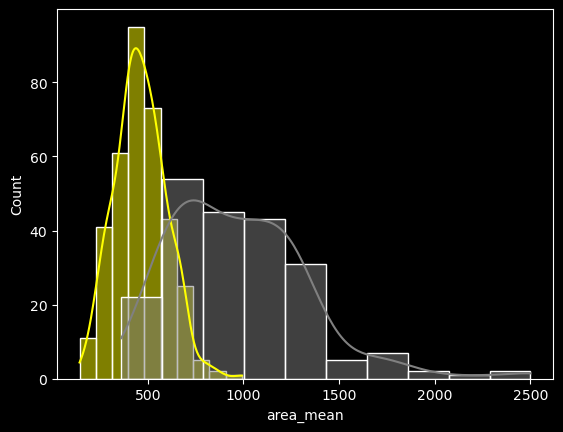

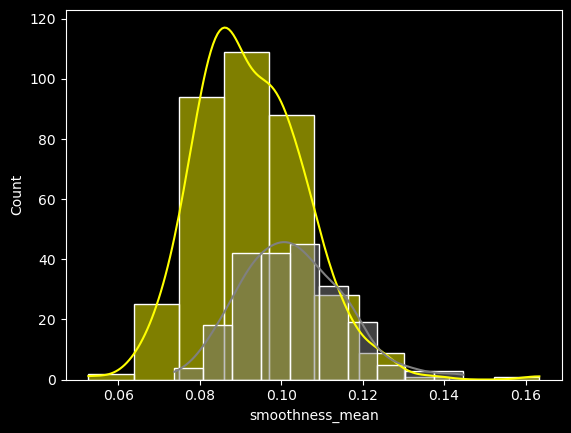

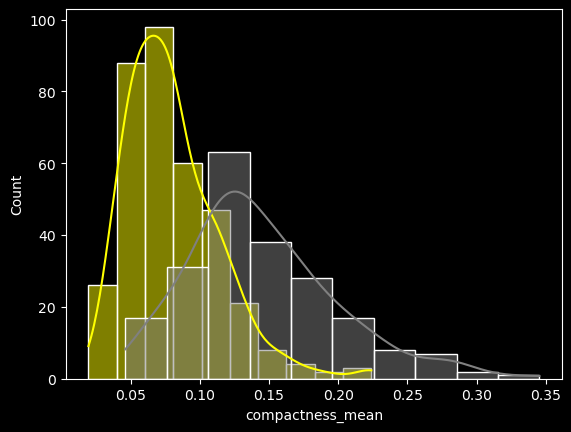

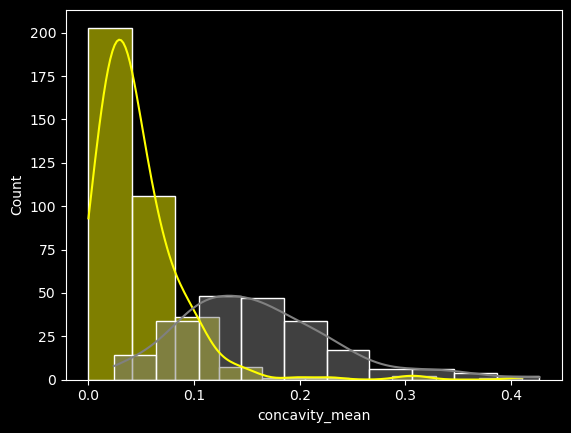

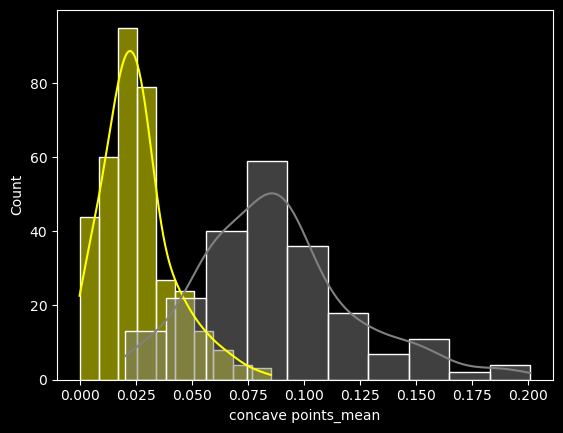

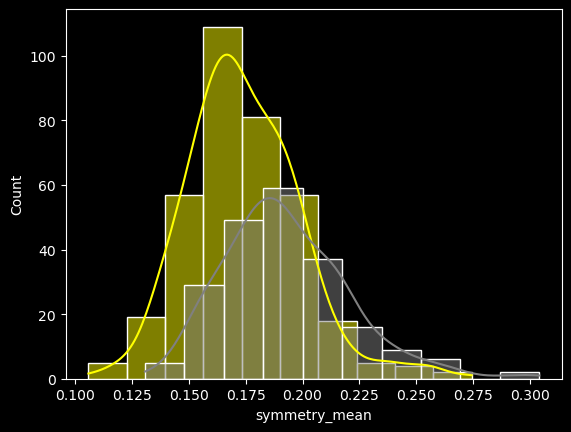

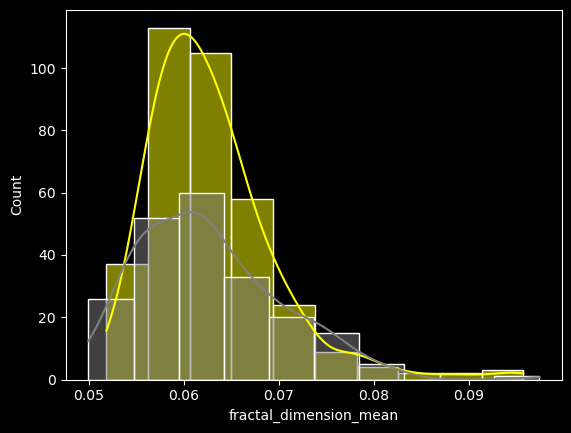

In [37]:
generate_histplot('radius_mean');
generate_histplot('texture_mean');
generate_histplot('perimeter_mean');
generate_histplot('area_mean');
generate_histplot('smoothness_mean');
generate_histplot('compactness_mean');
generate_histplot('concavity_mean');
generate_histplot('concave points_mean');
generate_histplot('symmetry_mean');
generate_histplot('fractal_dimension_mean');

## Gerando e Exibindo lmplots para Vários Atributos

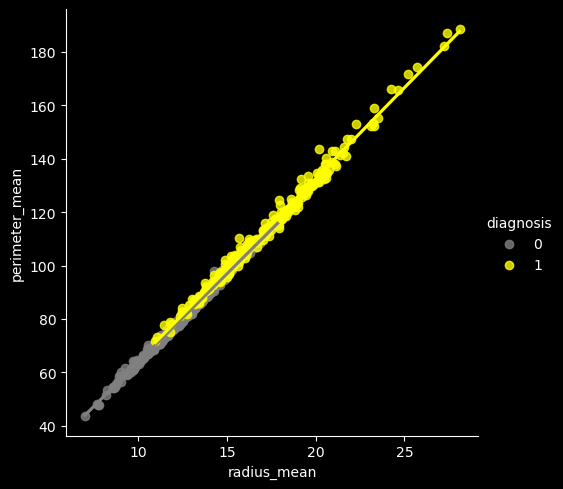

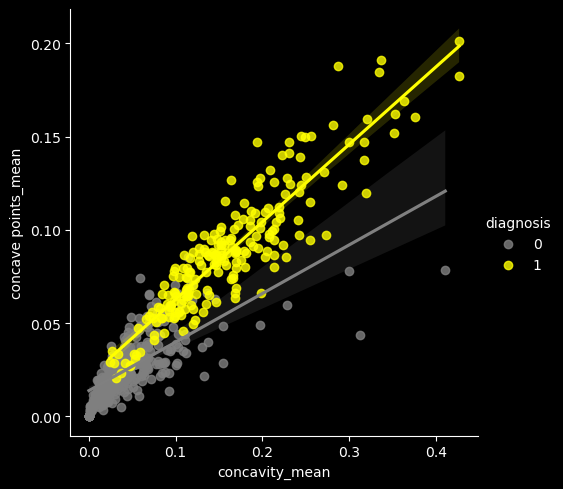

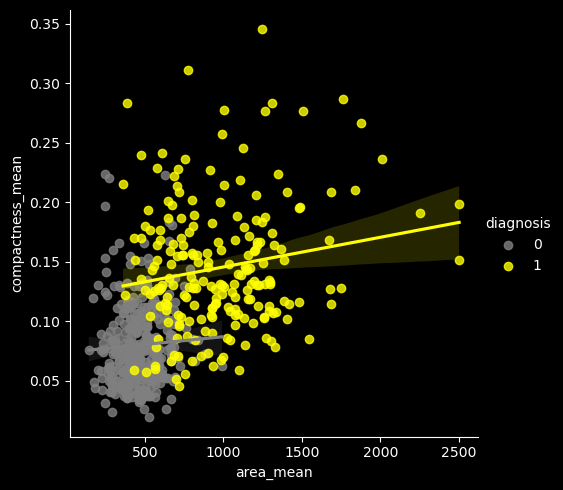

In [54]:

color_implot = sns.color=('grey','yellow')

sns.lmplot(data=df, x='radius_mean', y='perimeter_mean', hue='diagnosis', palette=(color_implot))
pyplot.show();

sns.lmplot(data=df, x='concavity_mean', y='concave points_mean', hue='diagnosis', palette=(color_implot))
pyplot.show();

sns.lmplot(data=df, x='area_mean', y='compactness_mean', hue='diagnosis', palette=(color_implot))
pyplot.show();

## Criando Modelo de Regressão Logística com Iterações Máximas Definidas como 10.000

In [55]:
log_model = linear_model.LogisticRegression(max_iter=10000)

## Definindo os Conjuntos Independentes (X) e Dependentes (y)

In [56]:
X = df.drop(columns=['diagnosis'])
y = df[['diagnosis']].copy()

## Criando os Conjuntos de Treinamento e Teste

In [57]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.333, random_state=41)

## Treinando o Modelo

In [58]:
log_model.fit(X_train.values,np.ravel(y_train))

LogisticRegression(max_iter=10000)

## Gerando Conjunto de Previsões

In [59]:
y_pred_log = log_model.predict(X_test.values)

## Análise de Precisão
## Calculando Precisão/Acurácia (Onde Acurácia = Previsões Corretas/Previsões Totais)
## Calculando Erro Quadrático Médio/Erro Médio
## Medida da Diferença entre os Valores Previstos e Reais
## Gerando Matriz de Confusão

Acurácia =  0.9789473684210527 
--------------------------------------------------
Média de Erro (Quadrático) =  0.021052631578947368 
--------------------------------------------------


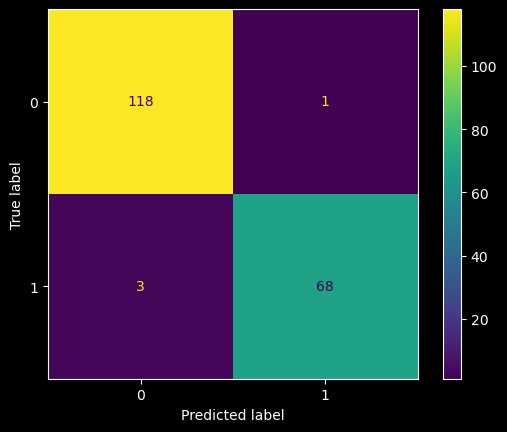

In [74]:
# Análise de Precisão
# Calculando Precisão/Acurácia (Onde Acurácia = Previsões Corretas/Previsões Totais)
print("Acurácia = ", metrics.accuracy_score(y_test, y_pred_log), "\n--------------------------------------------------")




# Calculando Erro Quadrático Médio/Erro Médio
# Medida da Diferença entre os Valores Previstos e Reais
print("Média de Erro (Quadrático) = ", metrics.mean_squared_error(y_test, y_pred_log), "\n--------------------------------------------------")


# color_cm = sns.color_palette=('BuPu')
# Gerando Matriz de Confusão
cm_log = metrics.confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
disp_log = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot()

# Validação Cruzada - Cross Validation 

In [78]:
y_array = np.ravel(y.values)
k_folds = model_selection.KFold(n_splits = 5, shuffle=True)
scores = model_selection.cross_val_score(log_model, X, y_array)

print("---------------------------------------------------------\nValor/Score Médio da Validação Cruzada: ", scores.mean(), "\n---------------------------------------------------------")

---------------------------------------------------------
Valor/Score Médio da Validação Cruzada:  0.9507995652848935 
---------------------------------------------------------
